# INTRODUCTION

This notebook takes you on a journey from data gathering through data wrangling to data analysis of the tweets from @weratedogs- A twitter accounts that rates dogs based on its custom rating system.

I have explored the tweets and have analyzed it after cleaning.

In-line markdown and visualizations have been added for easy comprehension.

# Data Gathering

In [1]:
#importing important packages that will be needed for my analysis

import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [2]:
# Reading my tweet archived file into a pandas dataframe

tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#view the first three records in the dataframe
tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### The tweet image predictions

This file (image_predictions.tsv) is present in each tweet according to a neural network. 
It has been hosted on Udacity's servers and so I downloaded it programaticlly using the `Requests` library and the following [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)


In [4]:
#import request and use it to write the file 

import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)


In [5]:
#read the tsv file into a dataframe and show the first three records

image_file = pd.read_csv('image-predictions.tsv', delimiter = '\t')
image_file.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

#We use tweepy; a package made for querying twitter APIs


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# tweet_archive is a DataFrame with the twitter_archive_enhanced.csv file.
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)


2356

In [8]:
#using the request library, I am writing into a Json file, data from the twitter API
json_url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

response = requests.get(json_url)

# Save HTML to file
with open("tweet-json.txt", mode='wb') as json_file:
    json_file.write(response.content)

In [9]:
# Reading my gathered data into a datframe while also picking 
# my desired fields needed for this analysis.


df_list = []
with open("tweet-json.txt", mode='r') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append({
        "tweet_id": data['id'], 
        "favorite_count": data["favorite_count"], 
        "retweet_count": data["retweet_count"]
        })
json_df = pd.DataFrame(df_list, columns = ['tweet_id',
'retweet_count', 
'favorite_count' ])

In [10]:
#Here you go!!!

json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# ASSSESSING MY DATASETS

### visual assessment

I will assess my dataset starting from the archived tweets stored in `tweet_archive` dataframe then the image file stored in the `image_file` dataframe and lastly the Json file in the `json_df` dataframe.

In [11]:
# Displaying the twitter archive

tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [12]:
# Displaying the image predictions

image_file.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [13]:
# displaying the json file gotten from the API

json_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### Programatic assessment

## Assessing my archive file that contains seventeen columns

- tweet id: A unique tweet identifier
- in_reply_to_status_id: This column contains for replies,the actual original tweet ids.
- in_reply_to_user_id: This column contains for replies, user_id of the tweet's author.
- timestamp: When the tweet was made.
- source: Where was the tweet made from? Iphone, web clients or other sources.
- text: The actual tweet.
- retweeted_status_id: This column contains for retweet,the actual original tweet ids.
- retweeted_status_user_id: This column contains for retweets, user_id of the tweet's author.
- retweeted_status_timestamp: time of retweet
- expanded_urls: url of tweet
- rating_numerator: numerator of dog ratings; ratings almost always greater than 10
- rating_denominator: denominator of dog ratings; ratings almost always have a denominator of 10
- name: name of the dog
- doggo: The dog stage when the dog is a bit bigger than a puppy... two values(None, doggo)
- floofer: The dog stage for big dogs... two values(None, floofer)
- pupper: The dog stage for a smaller doggo... two values(None, pupper)
- puppo: The dog stage for a puppy... two values(None, puppo)


In [14]:
#checking my dataset by column to also see its data type
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The `info()` is an important method for assessing a DataFrame as it gives you columns, number of non-null values and data types for each column which may spark more questions to see what kind of object values are contained in a column.

    From the above output, I know that I have some issues which I'll define just after assessing all my dataframes.

In [15]:
tweet_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
#checking the number of unique values in each column
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
#check no of duplicated records
tweet_archive.duplicated().sum()

0

In [18]:
#check columns with null records
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Assessing my json file that contains three columns

- Tweet Ids: A unique tweet identifier
- retweet_count: No of retweets on the post( A measure of engagements and popularity on twitter)
- favorite_count: No of likes given on a particular tweet.

In [19]:
#view the columns, no of not-null values and data types
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
#check no of unique values for each column
json_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [21]:
#check no of duplicated records
json_df.duplicated().sum()

0

## Assessing my image prediction file that contains twelve columns

- Tweet Ids: A unique tweet identifier
- jpg_url:  Url to the dog's image. (Image used for sharing the rating)
- image_num: Twitter has a maximum of 4 frames. This column shows which image was used for this prediction.
- p1, p2, p3: The three predictions done on this image based on an algorithm to detect breed.
- p1_conf, p2_conf, p3_conf: How confident the prediction is based on p1,p2,p3 consecutively.
- p1_dog, p2_dog, p3_dog: Two values(True or False) whether or not the algorithm correctly predicted the dog or not.


In [22]:
#view _
image_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#check no of unique values for each column
image_file.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
#check no of duplicated records
image_file.duplicated().sum()

0

In [25]:
image_file.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

From the assessments done, we see that there are no duplicated records and we also see the unique values and other information needed to understand the dataset.

In [26]:
json_df.max()

tweet_id          892420643555336193
retweet_count                  79515
favorite_count                132810
dtype: int64

In [27]:
json_df.min()

tweet_id          666020888022790149
retweet_count                      0
favorite_count                     0
dtype: int64

In [28]:
json_df.query('favorite_count == 132810')

,tweet_id,retweet_count,favorite_count
412,822872901745569793,48265,132810


# CLEANING

    Making copies of my data before cleaning to preserve the original dataset.

Note: This is good practice for all analyst. 'Always back up your data after gathering' for reference purpose. The `copy()` method does this effortlessly with few letters of code.

In [29]:
# Making copies of my data before cleaning
archive = tweet_archive.copy()
images = image_file.copy()
json_txt = json_df.copy()

## Issues discovered in these datasets.
The `archive` dataframe quality issues:

1. Data type of the column `tweet_id` is wrong since this is an id it should be a string not int.
2. `timestamp` column should be datetime not object. 
3. Only 78 rows have values in the `in_reply_to_status_id` , `in_reply_to_user_id` These columns hold information for records whose tweets are replies. The rows should be taken out.
4. Only 181 rows have values in the `retweeted_status_id` , `retweeted_status_user_id ` , `retweeted_status_timestamp` These columns hold information for records that are retweets and should be taken out to eliminate bias
5. Missing values in `expanded_urls` columns
6. Check the `name` column to correct values that are not actual dog names.

The `json_txt` dataframe quality issues:

7. Data type of the column `tweet_id` is wrong since this is an id, it should be a string not int.

The `images` dataframe quality issues:

8. Data type of the column `tweet_id` is wrong since this is an id it should be a string not int.
9. Check the p1,p2,p3 


## Tidiness

- Drop extraneous columns
- Combine dog stages into one
- Merge the dataset to have one master dataset for analysis

### DEFINE

Change all tweet_id to string.

### CODE

In [30]:
# Convert tweet_id column to string
archive['tweet_id'] = archive['tweet_id'].astype(str)
json_txt['tweet_id'] = json_txt['tweet_id'].astype(str)
images['tweet_id'] = images['tweet_id'].astype(str)

### TEST

In [31]:
print(type(archive.tweet_id[0]))
print(type(json_txt.tweet_id[0]))
print(type(images.tweet_id[0]))

<class 'str'>
<class 'str'>
<class 'str'>


### DEFINE

Change timestamp from object to datetime

### CODE

In [32]:
# Convert timestamp column to datetime
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

### TEST

In [33]:
#confirm the datatype for timstamp
archive.timestamp.dtype

datetime64[ns, UTC]

### DEFINE

Only 78 rows have values in the `in_reply_to_status_id` , `in_reply_to_user_id` These columns hold information for records whose tweets are replies. The rows should be taken out with records should be taken out.

### CODE

In [34]:
#Remove records that speak to replies; These are rows that have values in the two reply columns
#This is done using the query function to query only rows where these columns are null.

archive = archive.query('in_reply_to_status_id.isnull()')
archive = archive.query('in_reply_to_user_id.isnull()')

### TEST



In [35]:
#ensure we have no rows with values for both fields

print(sum(archive['in_reply_to_status_id'].notnull()))
print(sum(archive['in_reply_to_user_id'].notnull()))

0
0


In [36]:
#confirm the size of our dataframe has reduced by 78.
archive.shape

(2278, 17)

### DEFINE

Only 181 rows have values in the `retweeted_status_id` , `retweeted_status_user_id ` , `retweeted_status_timestamp` These columns hold information for records that are retweets and should be taken out to eliminate bias. The rows should be taken out with records should be taken out.


### CODE

In [37]:
#Remove records that speak to retweets; These are rows that have values in the three retweet columns
#This is done using the query function to query only rows where these columns are null.

archive = archive.query('retweeted_status_id.isnull()')
archive = archive.query('retweeted_status_user_id.isnull()')
archive = archive.query('retweeted_status_timestamp.isnull()')

### TEST

In [38]:
#confirm that all rows with values for retweet columns have been dropped.
print(sum(archive['retweeted_status_id'].notnull()))
print(sum(archive['retweeted_status_user_id'].notnull()))
print(sum(archive['retweeted_status_timestamp'].notnull()))

0
0
0


In [39]:
# check to see changes made were effected.

archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### DEFINE

Drop the five columns with 0 non-null values (two reply and three retweets columns). They wont be useful to our analysis.
Also the expanded url column is not useful for this analysis as it also has missing values for some records.

### CODE

In [40]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']
archive.drop(columns_to_drop, axis=1, inplace=True)

### TEST

In [41]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.6+ KB


### DEFINE

Looking at the rating_numerators, we may want to understand how this is done.

In [42]:
archive.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

Seeing that we have values way above the expected 15/10 ratings. I would further explore the text columns to see what we are missing.

In [43]:
archive.query('rating_numerator > 15').sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,121,110,None,None,None,None,None


In [44]:
# To enable me explore the text column well, I expand the column width and check.

archive.style.set_properties(subset = ['text'], **{'width':'500px'})
archive.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
216,850753642995093505,2017-04-08 16:54:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",11,10,Kyle,None,None,None,None


In [45]:
archive.query('rating_numerator > 15').head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,None,None,None,None,None


There is something wrong here... when the numerator rating has a decimal, it picks only the last part.
I will proceed to create a new `numerator` column to compare the existing `rating_numerator` column with the new one, against my `text` column for insights.

## CODE

In [46]:
# creating new column
archive['numerator'] = archive['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

In [47]:
archive.query('rating_numerator > 15').sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,None,11.26
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,None,None,None,None,None,80
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None,84
1843,675853064436391936,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,88,80,None,None,None,None,None,88
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None,165
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None,None,None,None,45
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,None,None,None,None,60
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,10,None,None,None,None,None,420
1779,677716515794329600,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,None,None,None,None,144
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None,9.75


In [48]:
#move the column side by side the existing rating numerator for easy comparison
# using pandas pop to remove the new column and store it in variable b
# then inserting it back into the dataframe at column 6, just after the existing numerator

b = archive.pop('numerator')
archive.insert(5, 'new_rating_numerator', b)

In [49]:
archive.query('rating_numerator > 15').sample(10)

,tweet_id,timestamp,source,text,rating_numerator,new_rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,9.75,10,Logan,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,99,90,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,60,60,50,a,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,50,Bluebert,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,44,44,40,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,11.26,10,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,144,120,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,420,10,None,None,None,None,None


Evidently, we can clearly see that some ratings were decimals and this can be seen above.

In [50]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2097 non-null   object             
 1   timestamp             2097 non-null   datetime64[ns, UTC]
 2   source                2097 non-null   object             
 3   text                  2097 non-null   object             
 4   rating_numerator      2097 non-null   int64              
 5   new_rating_numerator  2097 non-null   object             
 6   rating_denominator    2097 non-null   int64              
 7   name                  2097 non-null   object             
 8   doggo                 2097 non-null   object             
 9   floofer               2097 non-null   object             
 10  pupper                2097 non-null   object             
 11  puppo                 2097 non-null   object             
dtypes: dat

now i can update my rating_numerator and drop the old one

In [51]:
archive['rating_numerator'] = archive['new_rating_numerator']
archive.drop('new_rating_numerator',axis=1, inplace=True )

### TEST

In [52]:
archive.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1826,676440007570247681,2015-12-14 16:34:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,11,10,None,None,None,None,None
20,888078434458587136,2017-07-20 16:49:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,12,10,Gerald,None,None,None,None
2136,670055038660800512,2015-11-27 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,3,10,Tommy,None,None,None,None
1912,674394782723014656,2015-12-09 01:07:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,8,10,Gary,None,None,None,None
2213,668567822092664832,2015-11-22 23:12:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,11,10,Marvin,None,None,None,None
321,834209720923721728,2017-02-22 01:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,12,10,Wilson,None,None,None,None
1839,675891555769696257,2015-12-13 04:14:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,6,10,Donny,None,None,None,None
389,826476773533745153,2017-01-31 17:06:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,12,10,Pilot,doggo,None,None,None
912,757596066325864448,2016-07-25 15:19:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,4,10,None,None,None,None,None
34,885528943205470208,2017-07-13 15:58:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,13,10,Maisey,None,None,None,None


### DEFINE

Fix the inconsistensies and wrong values in the name column. This can be seen in the text column where the names were gotten.

### CODE

In [53]:
archive['name'].value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [54]:
lower_names = archive[archive['name'].str.islower()]['name'].values
upper_names =archive[archive['name'].str.isupper()]['name'].values
okay_names = archive[archive['name'].str.istitle()]['name'].values

print("lower names = ", list(lower_names))

print("upper names = ", upper_names)

print("actual names = ", list(okay_names))

lower names =  ['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']
upper names =  ['O' 'JD']
actual names =  ['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'None', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'None', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'None', 'None', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles

From the observation above, all the lower_case names are just words. But also, on the actual name, we see that 603 dogs have the value "None" as the dog name.
So we eliminate all these wrong names

In [55]:
archive.name.replace(lower_names, 'None', inplace=True)

### TEST

In [56]:
#check to see that all the identified wrong names have been replaced with None

archive[archive['name'].str.islower()]['name'].values

array([], dtype=object)

In [60]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### DEFINE

The dog stages doggo, pupper, puppo and floofer should be merged into one column and better grouped as category for easy analysis.

### CODE

In [68]:
archive.loc[0:2]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [59]:
print(archive.doggo.unique())
print(archive.pupper.unique())
print(archive.puppo.unique())
print(archive.floofer.unique())

['None' 'doggo']
['None' 'pupper']
['None' 'puppo']
['None' 'floofer']


In [216]:
archive.shape

(2097, 12)

In [215]:
#create a new column by combining the four columns of stages
archive['stage'] = archive[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [217]:
#check the new column
archive.stage.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: stage, dtype: int64

In [218]:
# convert the datatype from string to categorical
archive.stage = archive.stage.astype('category')

In [219]:
# drop the four columns
archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### TEST

In [220]:
# check to see what the new dataset looks like
archive.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
1263,710117014656950272,2016-03-16 14:54:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper got her hair chalked for her birth...,11,10,None,pupper
1519,690735892932222976,2016-01-23 03:20:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,13,10,Peaches,None
262,842765311967449089,2017-03-17 15:51:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,12,10,Indie,None


### DEFINE

Merging all my clean dataset into one master dataset

### CODE

In [298]:
master_data = []

In [299]:
master_data = pd.merge(archive, json_txt, on='tweet_id', how='left').merge(images, on='tweet_id', how='inner' )

### TEST

In [300]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   object             
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   stage               1971 non-null   category           
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  p1                  1971 non-null 

In [228]:
master_data.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [231]:
# splitting date and time from timestamp to create a date and time column for our analysis
master_data['tweet_date'] = pd.to_datetime(master_data['timestamp']).dt.date
master_data['tweet_time'] = pd.to_datetime(master_data['timestamp']).dt.time
master_data.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_date,tweet_time
365,813157409116065792,2016-12-25 23:00:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,12,10,Layla,None,2557,8588,...,0.843911,False,Pembroke,0.070567,True,Cardigan,0.041916,True,2016-12-25,23:00:08


In [232]:
#re-arrange column index and drop timestamp column.
print(master_data.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_date',
       'tweet_time'],
      dtype='object')


In [235]:
master_data = master_data.drop(columns= ['timestamp'])
master_data = master_data.reindex(columns = ['tweet_id', 'tweet_date',
       'tweet_time', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] )

In [236]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   object  
 1   tweet_date          1971 non-null   object  
 2   tweet_time          1971 non-null   object  
 3   source              1971 non-null   object  
 4   text                1971 non-null   object  
 5   rating_numerator    1971 non-null   object  
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   stage               1971 non-null   category
 9   retweet_count       1971 non-null   int64   
 10  favorite_count      1971 non-null   int64   
 11  jpg_url             1971 non-null   object  
 12  img_num             1971 non-null   int64   
 13  p1                  1971 non-null   object  
 14  p1_conf             1971 non-null   float64 
 15  p1_dog              1971 non-null   bo

In [237]:
# Storing our new dataset as csv.
master_data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# ANALYSIS AND VISUALIZATION

Here I explore these datasets to understand correlations, underlining factors as well as discover insights.

In [248]:
#import libraries needed for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Question one: What is the relationship between retweet counts and favorite(likes) counts

In [353]:
cor = master_data[['retweet_count', 'favorite_count']]
cor.corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.913014
favorite_count,0.913014,1.000000


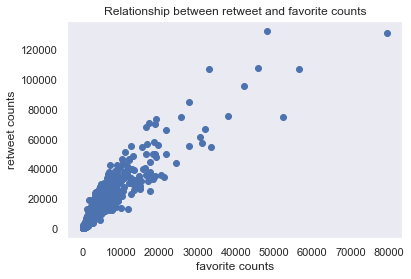

In [255]:
x, y  = master_data.retweet_count, master_data.favorite_count
 
plt.scatter(x,y)
plt.title("Relationship between retweet and favorite counts")
plt.xlabel("favorite counts")
plt.ylabel("retweet counts")
sns.set_style('dark')
plt.show()

From the table and graph above, we see a positive correlation between retweet count and favorite count of 0.9 which is strong 

In [329]:
maxi_rt = master_data.retweet_count.max()
mini_rt = master_data.retweet_count.min()
maxi_fav = master_data.favorite_count.max()
mini_fav = master_data.favorite_count.min()


print("maximum retweet_count = ", maxi_rt)
print("minimum retweet_count = ", mini_rt)
print("maximum favorite_count = ", maxi_fav )
print("minimum favorite_count = ", mini_fav)

maximum retweet_count =  79515
minimum retweet_count =  16
maximum favorite_count =  132810
minimum favorite_count =  81


Question Two: What day of the week holds the highest retweets and favorite counts?

This will better help us explore this correlation between retweets and likes.

timestamp
Friday       56625
Monday       45849
Saturday     79515
Sunday       30742
Thursday     27680
Tuesday      25661
Wednesday    42228
Name: retweet_count, dtype: int64


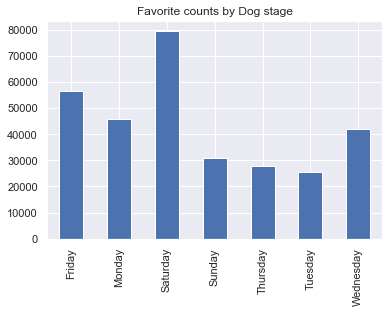

In [357]:
print(master_data.groupby(master_data.timestamp.dt.day_name())['retweet_count'].agg('max'))
master_data.groupby(master_data.timestamp.dt.day_name())['retweet_count'].agg('max').plot(kind = 'bar',title = 'Favorite counts by Day', xlabel = '');

timestamp
Friday       107015
Monday       107956
Saturday     132810
Sunday        73397
Thursday      85011
Tuesday       75193
Wednesday     95450
Name: favorite_count, dtype: int64


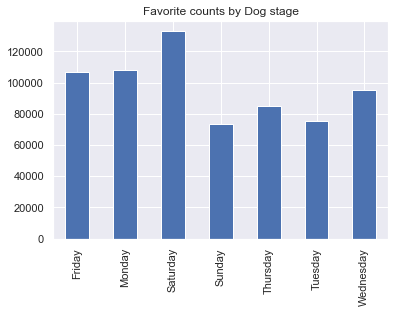

In [358]:
print(master_data.groupby(master_data.timestamp.dt.day_name())['favorite_count'].agg('max'))
master_data.groupby(master_data.timestamp.dt.day_name())['favorite_count'].agg('max').plot(kind = 'bar',title = 'Favorite counts by Day', xlabel = '');

This analysis shows that the highest retweet and favorite counts were gotten on the same day `saturday`

Question Three: Does the time of the day have any influence on tweet's enagagement in terms of retweet and likes?

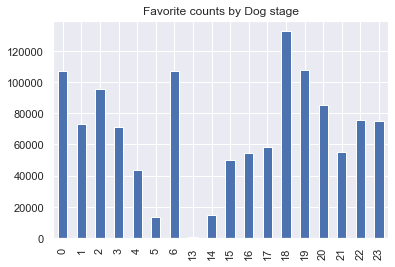

In [368]:
# print(master_data.groupby(master_data.timestamp.dt.hour)['favorite_count'].agg('max'))
master_data.groupby(master_data.timestamp.dt.hour)['favorite_count'].agg('max').plot(kind = 'bar',title = 'Favorite counts by hour of the day', xlabel = '');

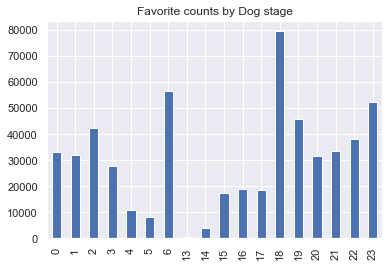

In [367]:
# print(master_data.groupby(master_data.timestamp.dt.hour)['retweet_count'].agg('max'))
master_data.groupby(master_data.timestamp.dt.hour)['retweet_count'].agg('max').plot(kind = 'bar',title = 'Favorite counts by hour of the day', xlabel = '');

Clearly we can say that enagagements on a tweet are highly correlated.

Question Four: Which dog stage had the highest no of retweets and likes (Favorite counts)

In [287]:
master_data['stage'].value_counts()


None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

A lot of our data didn't have actual dog stage recorded, we can see that most of the labeled dogs fell under the pupper stage though this may not  be true as this is not a statistical sample of our data.

stage
None       56625
doggo      79515
floofer    18497
pupper     32883
puppo      48265
Name: retweet_count, dtype: int64


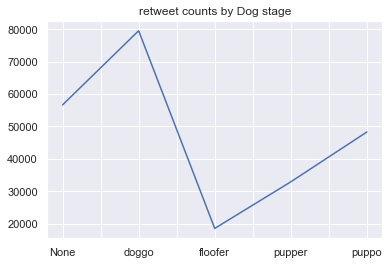

In [343]:
print(master_data.groupby(master_data.stage)['retweet_count'].agg('max'))
master_data.groupby(master_data.stage)['retweet_count'].agg('max').plot(title = 'retweet counts by Dog stage', xlabel = '');

stage
None       107956
doggo      131075
floofer     33345
pupper     106827
puppo      132810
Name: favorite_count, dtype: int64


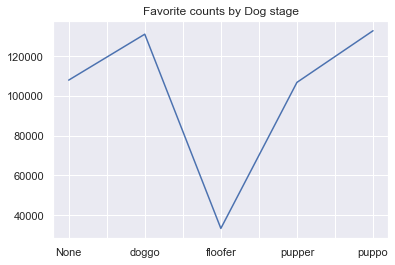

In [342]:
print(master_data.groupby(master_data.stage)['favorite_count'].agg('max'))
master_data.groupby(master_data.stage)['favorite_count'].agg('max').plot(title = 'Favorite counts by Dog stage', xlabel = '');

We are able to still see the dog stages that got the highest retweets and likes
Doggo got the highest number of retweets.
Puppo got the highest number of likes (Favorite counts)

Question Five: How was this tweeted? This speaks to the source.

C:\Users\Prof. Dr. Nkem\AppData\Local\Temp\ipykernel_19304\1699947412.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  master_data.source = master_data.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '');


source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1932
Name: tweet_id, dtype: int64


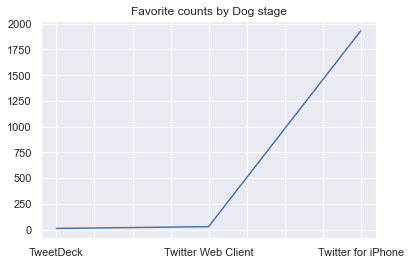

In [416]:
master_data.source = master_data.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '');
print(master_data.groupby(master_data.source)['tweet_id'].agg('count'));
master_data.groupby(master_data.source)['tweet_id'].agg('count').plot(title = 'Distribution of tweet sources', xlabel = '');

Question Six: Analyze highest count of breeds.

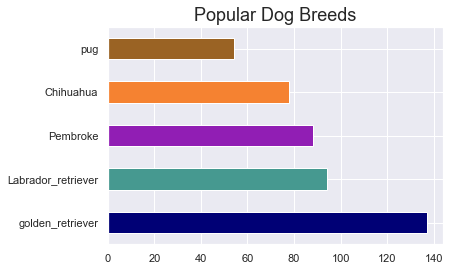

In [431]:
#Using the first prediction
master_data['p1'].value_counts()[:5].plot(kind='barh',
color = ['#000075',  '#469990', '#911eb4','#f58231', '#9A6324']);
plt.title("Popular Dog Breeds",fontsize = 18);

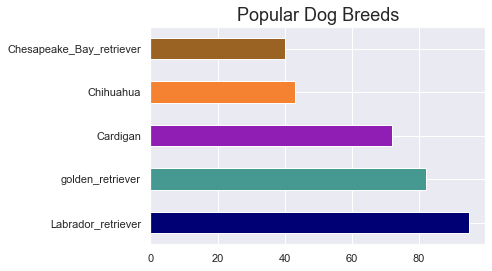

In [432]:
#using the second prediction
master_data['p2'].value_counts()[:5].plot(kind='barh',
color = ['#000075',  '#469990', '#911eb4','#f58231', '#9A6324']);
plt.title("Popular Dog Breeds",fontsize = 18);

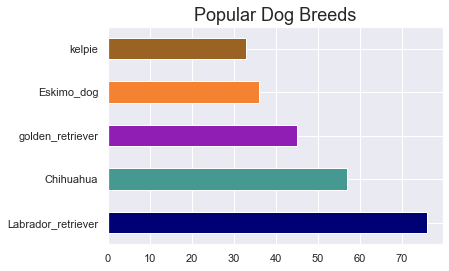

In [433]:
#using the third prediction
master_data['p3'].value_counts()[:5].plot(kind='barh',
color = ['#000075',  '#469990', '#911eb4','#f58231', '#9A6324']);
plt.title("Popular Dog Breeds",fontsize = 18);

We can tell that a golden_retriever and a Labrador_retriever were the most predicted breeds tweeted about. 

In [435]:
#Time coverage for this analysis
print(master_data['timestamp'].min())
print(master_data['timestamp'].max())

2015-11-15 22:32:08+00:00
2017-08-01 16:23:56+00:00


This analysis covers tweets from `15th November, 2015` - `1st August, 2017`